In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


#!pip3 install -U scikit-learn

## Importing Data

In [2]:
df = pd.read_csv('/datasets/winequalityN.csv',)

## Data Analyst

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [6]:
df.isnull().sum()/len(df)#null check

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [7]:
dfdroppedna = df.dropna()

In [8]:
dfdroppedna[['fixed acidity', 'volatile acidity']]

,fixed acidity,volatile acidity
0,7.0,0.270
1,6.3,0.300
2,8.1,0.280
3,7.2,0.230
4,7.2,0.230
...,...,...
6491,6.8,0.620
6492,6.2,0.600
6494,6.3,0.510
6495,5.9,0.645


In [9]:
dfdroppedna.isnull().sum()/len(dfdroppedna)#null check

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [10]:
dfdroppedna['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

In [11]:
dfdroppedna['type'] == 'white'

0        True
1        True
2        True
3        True
4        True
        ...  
6491    False
6492    False
6494    False
6495    False
6496    False
Name: type, Length: 6463, dtype: bool

In [12]:
dfdroppedna[dfdroppedna['type'] == 'red']

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
dfdroppedna[ dfdroppedna['pH'] > 1]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
dfdroppedna[dfdroppedna['quality'].isin([9])] #best wines

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [15]:
dfdroppedna[dfdroppedna['quality'].isin([3,4,5,6,7,8,9])]['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

In [16]:
dfdroppedna.groupby(by='type').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.326365,0.527659,0.271551,2.538512,0.087497,15.841808,46.463905,0.996752,3.310590,0.657866,10.419617,5.636535
white,6.855123,0.278071,0.334199,6.394343,0.045771,35.317146,138.340144,0.994026,3.188154,0.489700,10.516772,5.878029


In [17]:
dfdroppedna.groupby(by='type').agg(['min','mean','max'])

fixed acidity                 volatile acidity                  \
                min      mean   max              min      mean   max   
type                                                                   
red             4.6  8.326365  15.9             0.12  0.527659  1.58   
white           3.8  6.855123  14.2             0.08  0.278071  1.10   

      citric acid                 residual sugar  ...    pH sulphates  \
              min      mean   max            min  ...   max       min   
type                                              ...                   
red           0.0  0.271551  1.00            0.9  ...  4.01      0.33   
white         0.0  0.334199  1.66            0.6  ...  3.82      0.22   

                      alcohol                  quality                
           mean   max     min       mean   max     min      mean max  
type                                                                  
red    0.657866  2.00     8.4  10.419617  14.9       3  5.636535   8  
white  0.489700  1.08     8.0  10.516772  14.2       3  5.878029   9  

[2 rows x 36 columns]

In [18]:
white_avg_alchol = dfdroppedna[dfdroppedna['type'] == 'white']['alcohol']
red_avg_alchol = dfdroppedna[dfdroppedna['type'] == 'red']['alcohol']

In [19]:
sns.set_palette("pastel")

<AxesSubplot: xlabel='alcohol', ylabel='Count'>

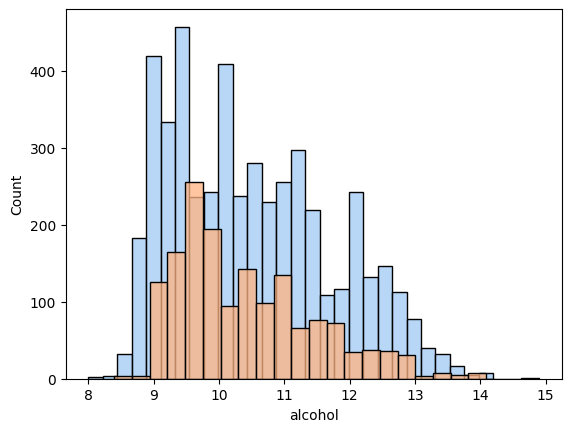

In [20]:
sns.histplot(white_avg_alchol)
sns.histplot(red_avg_alchol)

In [21]:
dfdroppedna['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [22]:
wines = dfdroppedna['type'].unique()

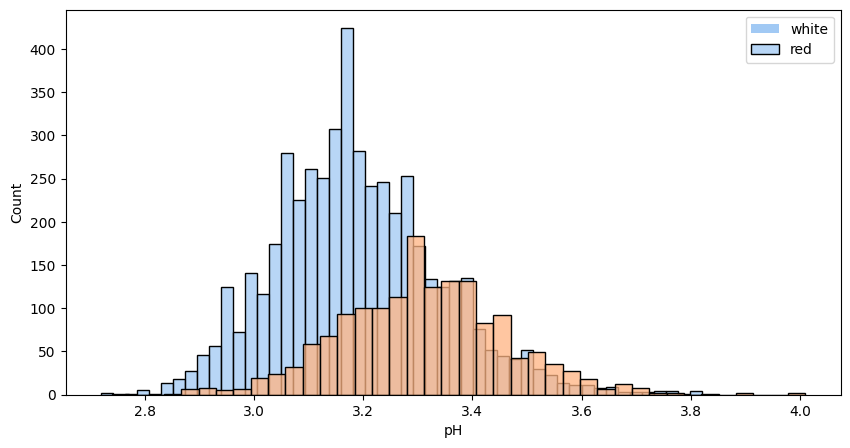

In [23]:
plt.figure(figsize=(10,5))
for wine in wines:
    data = dfdroppedna[dfdroppedna['type'] == wine]['pH']
    sns.histplot(data)
    
plt.legend(wines)

# Machine Learning

In [24]:
dfdroppedna = dfdroppedna.replace({'type': {'white': 1, 'red': 0}})

### set X an y

In [25]:
X = dfdroppedna.drop(["quality"], axis=1)
y = dfdroppedna.quality

### Normalization

In [26]:
X = preprocessing.normalize(X, axis=0)

### train test split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0, stratify=y)

### KNeighborsClassifier

##### finding the best k for knn

Max Train Score : %100.0 - K : [1]
Max Test Score : %60.696055684454755 - Best K : [1]


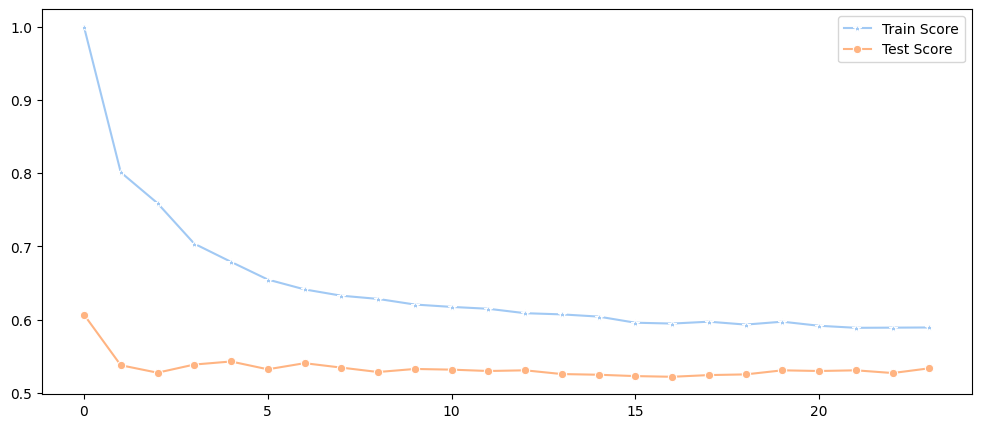

In [28]:
test_score = []
train_score = []

for i in range(1, 25):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

# max scores
max_train_score = max(train_score)
train_score_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
 
max_test_score = max(test_score)
test_score_ind = [i for i, v in enumerate(test_score) if v == max_test_score]


print(f'Max Train Score : %{max_train_score * 100} - K : {list(map(lambda x: x+1, train_score_ind))}')
print(f'Max Test Score : %{max_test_score * 100} - Best K : {list(map(lambda x: x+1, test_score_ind))}')

# graph

plt.figure(figsize=(12, 5))
p = sns.lineplot(train_score, marker="*", label="Train Score")
p = sns.lineplot(test_score, marker="o", label="Test Score")
plt.show()

### RandomForestClassifier

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_test, y_test)
rfc_score = rfc_score * 100
print(f"DecisionTreeClassifier Score: %{rfc_score:.2f}")

DecisionTreeClassifier Score: %67.94


### GaussianNB

In [30]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)
gnb_score = gnb_score * 100
print(f"DecisionTreeClassifier Score: %{gnb_score:.2f}")

DecisionTreeClassifier Score: %43.53


### DecisionTreeClassifier

In [31]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_test, y_test)
dtc_score = dtc_score * 100
print(f"DecisionTreeClassifier Score: %{dtc_score:.2f}")

DecisionTreeClassifier Score: %61.44


### LinearDiscriminantAnalysis

In [32]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_score = lda.score(X_test, y_test)
lda_score = lda_score * 100
print(f"LinearDiscriminantAnalysis Score: %{lda_score:.2f}")

LinearDiscriminantAnalysis Score: %54.39
